In [1]:
import numpy as np
from tensorflow.keras.layers import Dense, Activation, Input,Dropout,BatchNormalization
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt('../input/handtrain/handtrain.csv', delimiter=',')

angle = data[:,:-1].astype(np.float32)
label = data[:, -1].astype(np.float32)

print(angle.shape, label.shape)

(1216, 15) (1216,)


In [3]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

encoded_label = ohe.fit_transform(label.reshape(-1, 1)).toarray()
encoded_label = encoded_label.astype(np.float32)

print(encoded_label.shape)

(1216, 26)


In [4]:
ohe.categories_

[array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
       dtype=float32)]

In [5]:
input = Input(shape=(15,))

x = Dense(32, activation='relu')(input)
x = Dropout(0.25)(x)
x = BatchNormalization()(x)
x = Dense(64, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.25)(x)
x = BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.25)(x)

x = Dense(32, activation='relu')(x)

output = Dense(26, activation='softmax')(x)

model = Model(inputs=input, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

2022-05-22 16:25:26.818072: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-22 16:25:26.977238: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-22 16:25:26.978081: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-22 16:25:26.979330: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 15)]              0         
_________________________________________________________________
dense (Dense)                (None, 32)                512       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0     

In [17]:
history=model.fit(angle, encoded_label, epochs=400)
history.history.keys()

Epoch 1/400
38/38 [==============================] - 0s 3ms/step - loss: 0.4457 - acc: 0.8676
Epoch 2/400
38/38 [==============================] - 0s 3ms/step - loss: 0.3991 - acc: 0.8824
Epoch 3/400
38/38 [==============================] - 0s 3ms/step - loss: 0.4052 - acc: 0.8627
Epoch 4/400
38/38 [==============================] - 0s 5ms/step - loss: 0.4079 - acc: 0.8635
Epoch 5/400
38/38 [==============================] - 0s 4ms/step - loss: 0.3931 - acc: 0.8602
Epoch 6/400
38/38 [==============================] - 0s 4ms/step - loss: 0.4652 - acc: 0.8479
Epoch 7/400
38/38 [==============================] - 0s 4ms/step - loss: 0.3958 - acc: 0.8594
Epoch 8/400
38/38 [==============================] - 0s 3ms/step - loss: 0.4015 - acc: 0.8684
Epoch 9/400
38/38 [==============================] - 0s 4ms/step - loss: 0.4421 - acc: 0.8561
Epoch 10/400
38/38 [==============================] - 0s 3ms/step - loss: 0.4003 - acc: 0.8701
Epoch 11/400
38/38 [==============================] - 0s 3m

dict_keys(['loss', 'acc'])

In [18]:
def vis(history,name) :
    plt.title(f"{name.upper()}")
    plt.xlabel('epochs')
    plt.ylabel(f"{name.lower()}")
    value = history.history.get(name)
    val_value = history.history.get(f"val_{name}",None)
    epochs = range(1, len(value)+1)
    plt.plot(epochs, value, 'b-', label=f'training {name}')
    if val_value is not None :
        plt.plot(epochs, val_value, 'r:', label=f'validation {name}')
    plt.legend(loc='upper center', bbox_to_anchor=(0.05, 1.2) , fontsize=10 , ncol=1)
    
def plot_history(history) :
    key_value = list(set([i.split("val_")[-1] for i in list(history.history.keys())]))
    plt.figure(figsize=(12, 4))
    for idx , key in enumerate(key_value) :
        plt.subplot(1, len(key_value), idx+1)
        vis(history, key)
    plt.tight_layout()
    plt.show()

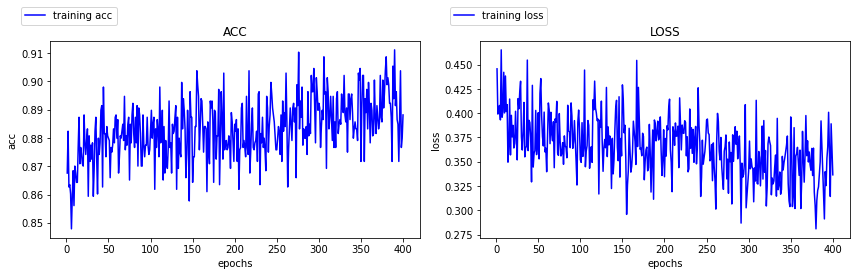

In [19]:
plot_history(history)

In [23]:
# print(history.history['loss'])
print(history.history['acc'][389])


0.9111841917037964


In [26]:
model.save('handtrain(400(91)).h5')